In [1]:
#%% INITIAL SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Ubuntu-inspired color palette
ubuntu_colors = ["#E95420", "#77216F", "#5E2750", "#2C001E", "#AEA79F"]
sns.set_palette(ubuntu_colors)

# Load dataset with Ubuntu principle: "Data belongs to the community"
df = pd.read_csv('fertility.csv')


In [2]:
#%% DATA INSPECTION - "Understanding Our Community"
print("="*55)
print("STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)")
print("="*55)


STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)


In [3]:
# Initial exploration
print(f"\n📊 Dataset Shape: {df.shape}")
print("\n🔍 First 5 Rows:")
display(df.head())


📊 Dataset Shape: (100, 10)

🔍 First 5 Rows:


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [4]:
print("\n🧠 Data Summary:")
display(df.info())


🧠 Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


None

In [5]:
print("\n📝 Descriptive Statistics:")
display(df.describe(include='all'))


📝 Descriptive Statistics:


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
count,100,100.000000,100,100,100,100,100,100,100.000000,100
unique,4,NaN,2,2,2,3,5,3,NaN,2
top,spring,NaN,yes,no,yes,more than 3 months ago,hardly ever or never,never,NaN,Normal
freq,37,NaN,87,56,51,63,40,56,NaN,88
mean,NaN,30.110000,NaN,NaN,NaN,NaN,NaN,NaN,10.800000,NaN
std,NaN,2.246861,NaN,NaN,NaN,NaN,NaN,NaN,33.616975,NaN
min,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
50%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
75%,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


In [6]:
# Check missing values - Ubuntu: "Every voice matters"
print("\n🔎 Missing Values (Ubuntu: 'No Voice Left Unheard'):")
missing_data = df.isnull().sum()
display(missing_data[missing_data > 0])


🔎 Missing Values (Ubuntu: 'No Voice Left Unheard'):


Series([], dtype: int64)

In [7]:
#%% DATA CLEANING - "Community Healing"
print("\n" + "="*55)
print("STEP 2: DATA CLEANING (Ubuntu: Healing the Community)")
print("="*55)



STEP 2: DATA CLEANING (Ubuntu: Healing the Community)



🚨 Outlier Detection in 'Sitting Hours':


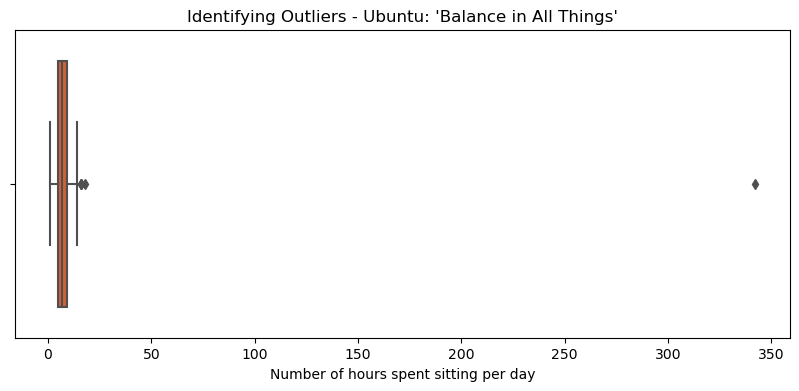

In [8]:
# Handle outliers - Ubuntu: "Correcting misrepresentations"
print("\n🚨 Outlier Detection in 'Sitting Hours':")
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Number of hours spent sitting per day'])
plt.title("Identifying Outliers - Ubuntu: 'Balance in All Things'")
plt.show()


In [9]:
# Fix outlier (342 hours is impossible)
df.loc[df['Number of hours spent sitting per day'] > 24, 
        'Number of hours spent sitting per day'] = np.nan

In [10]:
# Impute missing values with median - Ubuntu: "Community Wisdom"
sitting_median = df['Number of hours spent sitting per day'].median()
df['Number of hours spent sitting per day'].fillna(sitting_median, inplace=True)


In [11]:
# Clean categorical inconsistencies - Ubuntu: "Harmonizing Voices"
df['High fevers in the last year'] = df['High fevers in the last year'].replace('no', 'No')
df['Frequency of alcohol consumption'] = df['Frequency of alcohol consumption'].str.lower()


In [12]:
print("\n✅ Healing Complete! Outliers corrected and data harmonized.")



✅ Healing Complete! Outliers corrected and data harmonized.


In [15]:
#%% EXPLORATORY ANALYSIS - "Community Stories"
print("\n" + "="*75)
print("STEP 3: EXPLORATORY ANALYSIS (Ubuntu: Sharing Community Stories)")
print("="*75)



STEP 3: EXPLORATORY ANALYSIS (Ubuntu: Sharing Community Stories)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Age Distribution\nUbuntu: 'Value Every Generation'")

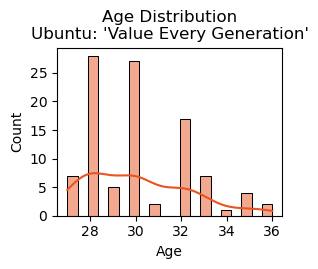

In [17]:
# Age distribution - Ubuntu: "Value Every Generation"
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution\nUbuntu: 'Value Every Generation'")

Text(0.5, 1.0, "Diagnosis Distribution\nUbuntu: 'All Conditions Matter'")

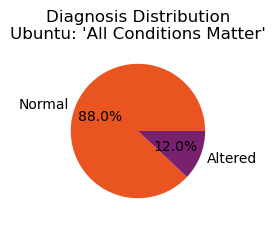

In [18]:
# Diagnosis balance - Ubuntu: "All Conditions Matter"
plt.subplot(2, 2, 2)
diagnosis_counts = df['Diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%')
plt.title("Diagnosis Distribution\nUbuntu: 'All Conditions Matter'")

Text(0.5, 1.0, "Smoking Habits\nUbuntu: 'Collective Health Patterns'")

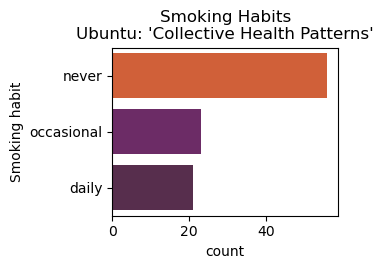

In [19]:
# Lifestyle factors - Ubuntu: "Collective Habits"
plt.subplot(2, 2, 3)
sns.countplot(data=df, y='Smoking habit', order=df['Smoking habit'].value_counts().index)
plt.title("Smoking Habits\nUbuntu: 'Collective Health Patterns'")

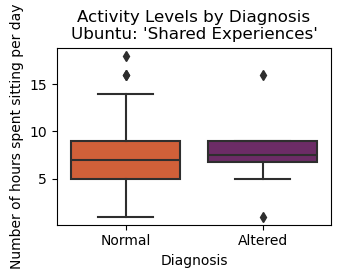

In [20]:
# Sitting hours by diagnosis - Ubuntu: "Shared Experiences"
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Diagnosis', y='Number of hours spent sitting per day')
plt.title("Activity Levels by Diagnosis\nUbuntu: 'Shared Experiences'")

plt.tight_layout()
plt.show()

In [22]:
#%% FEATURE RELATIONSHIPS - "Community Connections"
print("\n" + "="*65)
print("STEP 4: FEATURE RELATIONSHIPS (Ubuntu: We Are Connected)")
print("="*65)



STEP 4: FEATURE RELATIONSHIPS (Ubuntu: We Are Connected)


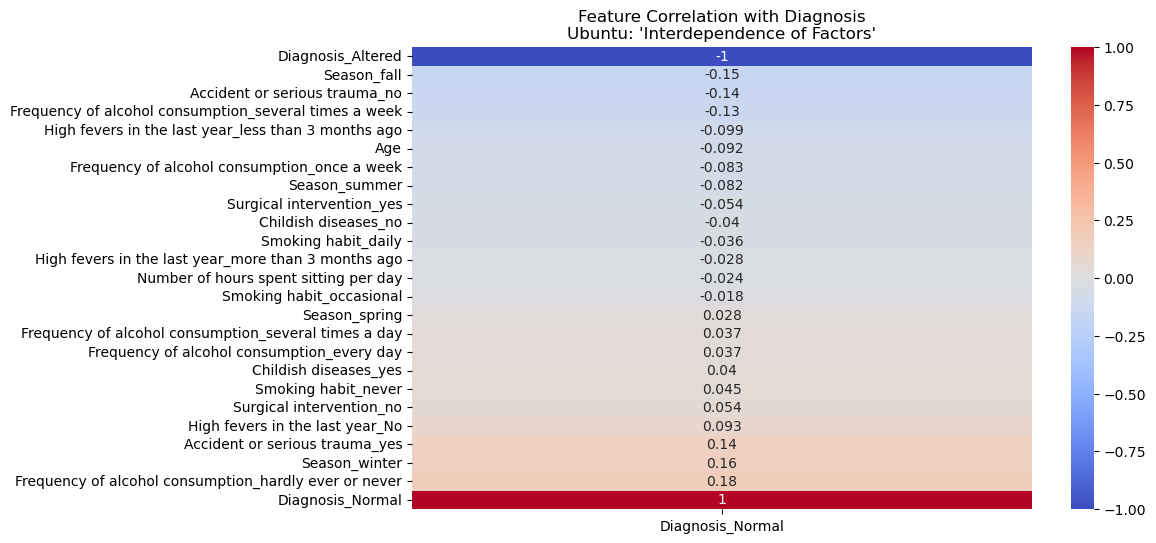

In [23]:
# Correlation analysis - Ubuntu: "Interdependence"
plt.figure(figsize=(10, 6))
sns.heatmap(pd.get_dummies(df).corr()[['Diagnosis_Normal']].sort_values('Diagnosis_Normal'),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Diagnosis\nUbuntu: 'Interdependence of Factors'")
plt.show()

In [24]:
# Cross-tabulation: Seasonal impact - Ubuntu: "Nature's Rhythms"
print("\n🌱 Seasonal Impact on Diagnosis (Ubuntu: 'Respecting Nature's Rhythms'):")
season_diag = pd.crosstab(df['Season'], df['Diagnosis'], normalize='index') * 100
display(season_diag.style.background_gradient(cmap='YlGn'))


🌱 Seasonal Impact on Diagnosis (Ubuntu: 'Respecting Nature's Rhythms'):


Diagnosis,Altered,Normal
Season,,
fall,19.354839,80.645161
spring,10.810811,89.189189
summer,25.000000,75.000000
winter,3.571429,96.428571


In [26]:
#%% DATA PREPROCESSING - "Preparing for Collective Wisdom"
print("\n" + "="*75)
print("STEP 5: PREPROCESSING (Ubuntu: Preparing for Collective Wisdom)")
print("="*75)



STEP 5: PREPROCESSING (Ubuntu: Preparing for Collective Wisdom)


In [27]:
# Encode categorical variables - Ubuntu: "Translating Diverse Voices"
encoder = LabelEncoder()
categorical_cols = ['Season', 'Childish diseases', 'Accident or serious trauma', 
                    'Surgical intervention', 'High fevers in the last year',
                    'Frequency of alcohol consumption', 'Smoking habit', 'Diagnosis']

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n🔤 Encoded Data Head:")
display(df.head())


🔤 Encoded Data Head:


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,2,2,2,16.0,1
1,1,35,1,0,1,2,2,0,6.0,0
2,1,27,1,0,0,2,1,1,9.0,1
3,1,32,0,1,1,2,1,1,7.0,1
4,1,30,1,1,0,2,2,1,9.0,0


In [28]:
# Feature engineering - Ubuntu: "Building Collective Knowledge"
df['Lifestyle_risk'] = (df['Smoking habit'] > 0).astype(int) + \
                       (df['Frequency of alcohol consumption'] > 1).astype(int) + \
                       (df['Number of hours spent sitting per day'] > 8).astype(int)

print("\n⚙️ New Feature Created: Lifestyle_risk (0-3 scale)")
print("Ubuntu: 'Holistic Understanding of Well-being'")


⚙️ New Feature Created: Lifestyle_risk (0-3 scale)
Ubuntu: 'Holistic Understanding of Well-being'


In [29]:
# Final dataset preview
print("\n✨ Preprocessed Data Ready for Modeling:")
display(df.head())


✨ Preprocessed Data Ready for Modeling:


,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis,Lifestyle_risk
0,1,30,0,1,1,2,2,2,16.0,1,3
1,1,35,1,0,1,2,2,0,6.0,0,1
2,1,27,1,0,0,2,1,1,9.0,1,2
3,1,32,0,1,1,2,1,1,7.0,1,1
4,1,30,1,1,0,2,2,1,9.0,0,3
